In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
pd.set_option('display.max_columns', None)

In [129]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [130]:
df.shape

(3550, 18)

In [131]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,international city by sobha phase 2,sector 109,8.75,24306.0,5.0,5.0,3+,3.0,New Property,3600.00,1.0,1.0,1.0,1.0,0.0,2.0,153.0
1,house,eldeco mansionz,sector 48,6.40,23704.0,4.0,4.0,3,3.0,Moderately Old,2700.00,0.0,1.0,1.0,0.0,0.0,2.0,151.0
2,flats,bestech park view city,sector 49,2.90,12170.0,4.0,4.0,3+,5.0,Moderately Old,2383.00,0.0,1.0,0.0,0.0,0.0,0.0,117.0
3,flats,denso haryana housing society,manesar,0.90,4308.0,3.0,3.0,3+,5.0,Moderately Old,2089.00,0.0,1.0,0.0,0.0,0.0,0.0,7.0
4,flats,experion windchants,sector 112,3.40,12134.0,3.0,3.0,2,14.0,Relatively New,2225.56,0.0,0.0,0.0,0.0,0.0,2.0,159.0


In [132]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [133]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,sector 109,8.75,5.0,5.0,3+,3.0,New Property,3600.00,1.0,1.0,1.0,1.0,0.0,2.0,153.0
1,house,sector 48,6.40,4.0,4.0,3,3.0,Moderately Old,2700.00,0.0,1.0,1.0,0.0,0.0,2.0,151.0
2,flats,sector 49,2.90,4.0,4.0,3+,5.0,Moderately Old,2383.00,0.0,1.0,0.0,0.0,0.0,0.0,117.0
3,flats,manesar,0.90,3.0,3.0,3+,5.0,Moderately Old,2089.00,0.0,1.0,0.0,0.0,0.0,0.0,7.0
4,flats,sector 112,3.40,3.0,3.0,2,14.0,Relatively New,2225.56,0.0,0.0,0.0,0.0,0.0,2.0,159.0


# Luxury Score

<Axes: ylabel='luxury_score'>

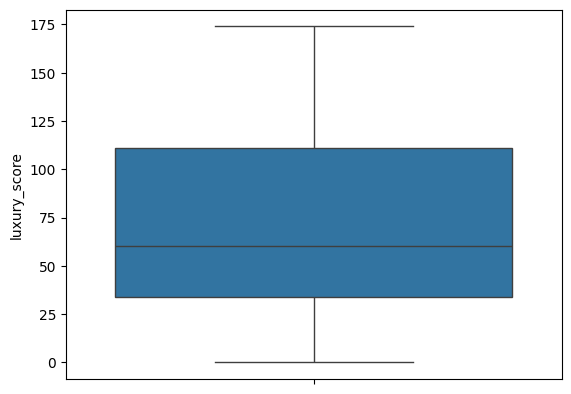

In [134]:
sns.boxplot(df['luxury_score'])

In [135]:
def categorize_luxury(score):
    if 0 <= score <= 50:
        return "Low"
    elif 50<= score<= 150:
        return "Medium"
    elif 150<= score<= 175:
        return "High"
    else:
        return None #or "Undefine" or any other labelfor scores outside the define bins.

In [136]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [137]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,house,sector 109,8.75,5.0,5.0,3+,3.0,New Property,3600.00,1.0,1.0,1.0,1.0,0.0,2.0,153.0,High
1,house,sector 48,6.40,4.0,4.0,3,3.0,Moderately Old,2700.00,0.0,1.0,1.0,0.0,0.0,2.0,151.0,High
2,flats,sector 49,2.90,4.0,4.0,3+,5.0,Moderately Old,2383.00,0.0,1.0,0.0,0.0,0.0,0.0,117.0,Medium
3,flats,manesar,0.90,3.0,3.0,3+,5.0,Moderately Old,2089.00,0.0,1.0,0.0,0.0,0.0,0.0,7.0,Low
4,flats,sector 112,3.40,3.0,3.0,2,14.0,Relatively New,2225.56,0.0,0.0,0.0,0.0,0.0,2.0,159.0,High


<Axes: ylabel='floorNum'>

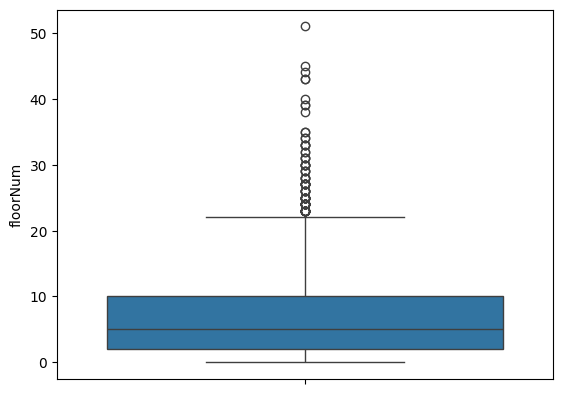

In [138]:
sns.boxplot(df['floorNum'])

In [139]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low floor"
    elif 3 <= floor<= 10:
        return "Medium floor"
    elif 11<= floor<= 51:
        return "High floor"
    else:
        return None #or "Undefine" or any other labelfor scores outside the define bins.

In [140]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [141]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,house,sector 109,8.75,5.0,5.0,3+,3.0,New Property,3600.00,1.0,1.0,1.0,1.0,0.0,2.0,153.0,High,Medium floor
1,house,sector 48,6.40,4.0,4.0,3,3.0,Moderately Old,2700.00,0.0,1.0,1.0,0.0,0.0,2.0,151.0,High,Medium floor
2,flats,sector 49,2.90,4.0,4.0,3+,5.0,Moderately Old,2383.00,0.0,1.0,0.0,0.0,0.0,0.0,117.0,Medium,Medium floor
3,flats,manesar,0.90,3.0,3.0,3+,5.0,Moderately Old,2089.00,0.0,1.0,0.0,0.0,0.0,0.0,7.0,Low,Medium floor
4,flats,sector 112,3.40,3.0,3.0,2,14.0,Relatively New,2225.56,0.0,0.0,0.0,0.0,0.0,2.0,159.0,High,High floor


In [142]:
train_df.drop(columns=['floorNum', 'luxury_score'], inplace=True)

In [143]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,house,sector 109,8.75,5.0,5.0,3+,New Property,3600.00,1.0,1.0,1.0,1.0,0.0,2.0,High,Medium floor
1,house,sector 48,6.40,4.0,4.0,3,Moderately Old,2700.00,0.0,1.0,1.0,0.0,0.0,2.0,High,Medium floor
2,flats,sector 49,2.90,4.0,4.0,3+,Moderately Old,2383.00,0.0,1.0,0.0,0.0,0.0,0.0,Medium,Medium floor
3,flats,manesar,0.90,3.0,3.0,3+,Moderately Old,2089.00,0.0,1.0,0.0,0.0,0.0,0.0,Low,Medium floor
4,flats,sector 112,3.40,3.0,3.0,2,Relatively New,2225.56,0.0,0.0,0.0,0.0,0.0,2.0,High,High floor


In [176]:
exp_df = train_df.drop(columns=['pooja room', 'others', 'luxury_category'])
exp_df.to_csv('gurgaon_properties_post_feature_selection_v2.csv', index=False)

In [144]:
from sklearn.preprocessing import OrdinalEncoder

#Create a copy of original data for label encoding
data_label_encoded = train_df.copy()
categorical_col = train_df.select_dtypes(include=['object']).columns

#apply label encoding to categorical columns
for col in categorical_col:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)


#Spliting the dataset into testing and training dataset
x_label = data_label_encoded.drop('price', axis = 1)
y_label = data_label_encoded['price']


[array(['flats', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'new',
       'new sector 2', 'sector 1', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 10a', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17a', 'sector 17b', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 33 road', 'sector 36', 'sector 36a',
       'sector 37', 'sector 37c', 'sector 37d', 'sector 38', 'sector 39',
       'sector 4', 'sector 40', 'sector 41', 'sector 43', 'sector 45',
       'sector 46', 'sector 47', 'sector 48', 'sector 49', 'sector 5',
       'sector 50', 'sector 51',

In [145]:
x_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,1.0,13.0,5.0,5.0,4.0,1.0,3600.00,1.0,1.0,1.0,1.0,0.0,2.0,0.0,2.0
1,1.0,57.0,4.0,4.0,3.0,0.0,2700.00,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0
2,0.0,58.0,4.0,4.0,4.0,0.0,2383.00,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0
3,0.0,2.0,3.0,3.0,4.0,0.0,2089.00,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
4,0.0,18.0,3.0,3.0,2.0,3.0,2225.56,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,0.0,66.0,4.0,4.0,2.0,4.0,2300.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
3546,1.0,108.0,4.0,4.0,4.0,3.0,5000.00,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0
3547,0.0,91.0,3.0,3.0,4.0,2.0,2176.00,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0
3548,0.0,41.0,2.0,2.0,3.0,3.0,1266.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [146]:
y_label

0       8.75
1       6.40
2       2.90
3       0.90
4       3.40
        ... 
3545    2.00
3546    2.75
3547    1.10
3548    0.71
3549    0.97
Name: price, Length: 3550, dtype: float64

# Technique 1 -> Correlation Technique

<Axes: >

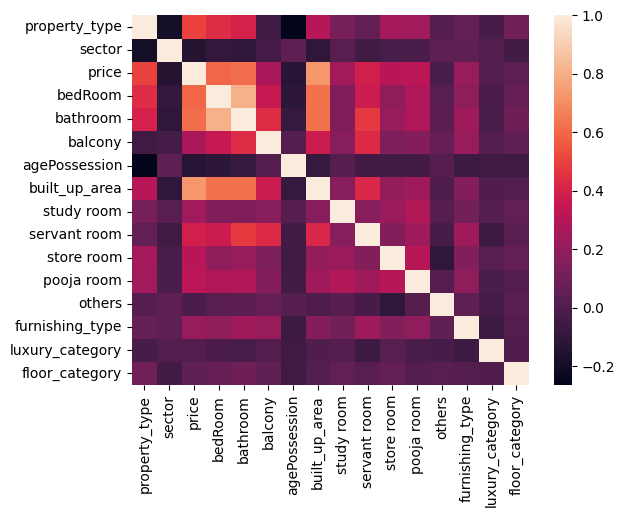

In [147]:
sns.heatmap(data_label_encoded.corr())

In [148]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index': 'feature', 'price': 'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.145289
1,price,1.000000
2,bedRoom,0.592257
3,bathroom,0.613069
4,balcony,0.270844
5,agePossession,-0.129839
6,built_up_area,0.725887
7,study room,0.241794
8,servant room,0.390777
9,store room,0.310517


# Technique 2 -> Random Forest Feature Selection

In [149]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on Label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label. fit(x_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd. DataFrame ({
    'feature': x_label.columns,
    'rf_importance': rf_label. feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.618522
0,property_type,0.107294
1,sector,0.105704
2,bedRoom,0.036461
8,servant room,0.029934
3,bathroom,0.028845
5,agePossession,0.014143
4,balcony,0.012225
7,study room,0.010481
14,floor_category,0.007615


# Technique 3 -> Gradient Boosting Feature Importance

In [150]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Gradient Boosting regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(x_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': x_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3


,feature,gb_importance
6,built_up_area,0.644763
1,sector,0.103503
0,property_type,0.102865
2,bedRoom,0.044215
3,bathroom,0.040510
8,servant room,0.034374
7,study room,0.009187
9,store room,0.005106
10,pooja room,0.004410
5,agePossession,0.003265


# Technique 4 -> Permutation Importance 

In [151]:
from sklearn. inspection import permutation_importance 
from sklearn.model_selection import train_test_split

x_train_label, x_test_label, y_train_label, y_test_label = train_test_split(x_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(x_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, x_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd. DataFrame({
    'feature': x_label.columns,
    'permutation_importance': perm_importance. importances_mean
}). sort_values (by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.665332
0,property_type,0.219417
1,sector,0.138835
8,servant room,0.048244
3,bathroom,0.016088
2,bedRoom,0.008037
7,study room,0.006574
4,balcony,0.004273
9,store room,0.002362
14,floor_category,0.001127


# Technique 5 -> LASSO

In [152]:
from sklearn. linear_model import Lasso 
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_label)

# Train a LASSO regression model
# We'Ll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso. fit(x_scaled, y_label)

# Extract coefficients
fi_df5 = pd. DataFrame({
    'feature': x_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values (by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
6,built_up_area,1.399852
0,property_type,0.698954
3,bathroom,0.318126
9,store room,0.203519
7,study room,0.189510
8,servant room,0.189174
12,furnishing_type,0.151722
10,pooja room,0.106818
13,luxury_category,0.054580
2,bedRoom,0.024995


# Technique 6 -> RFE 

In [153]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the Label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=x_label.shape[1], step=1)
selector_label = selector_label. fit(x_label, y_label)

# Get the selected features based on RFE
selected_features = x_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying Linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd. DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
6,built_up_area,0.620756
0,property_type,0.106789
1,sector,0.103160
2,bedRoom,0.034143
8,servant room,0.031216
3,bathroom,0.028465
5,agePossession,0.015421
4,balcony,0.013117
7,study room,0.010700
13,luxury_category,0.007869


# Technique 7 -> Linear Regression Weights

In [154]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_scaled, y_label)

# Extract coefficients
fi_df7 = pd. DataFrame ({
    'feature': x_label.columns,
    'reg_coeffs': lin_reg.coef_
}). sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
6,built_up_area,1.403334
0,property_type,0.697059
3,bathroom,0.324618
9,store room,0.207915
8,servant room,0.198596
7,study room,0.197974
12,furnishing_type,0.161290
10,pooja room,0.109664
13,luxury_category,0.065589
2,bedRoom,0.028295


In [155]:
# final_fi_df = fi_df1
# final_fi_df.merge(fi_df2, on='feature').merge(fi_df3, on='feature').merge(fi_df4, on='feature').merge(fi_df5, on='feature').merge(fi_df6, on='feature').merge(fi_df7, on='feature').set_index('features')

In [156]:
print(fi_df1.columns)
print(fi_df2.columns)
print(fi_df3.columns)
print(fi_df4.columns)
print(fi_df5.columns)
print(fi_df6.columns)
print(fi_df7.columns)


Index(['feature', 'corr_coeff'], dtype='object')
Index(['feature', 'rf_importance'], dtype='object')
Index(['feature', 'gb_importance'], dtype='object')
Index(['feature', 'permutation_importance'], dtype='object')
Index(['feature', 'lasso_coeff'], dtype='object')
Index(['feature', 'rfe_score'], dtype='object')
Index(['feature', 'reg_coeffs'], dtype='object')


In [163]:
# Replace 'feature' with the correct column name
final_fi_df = fi_df1.set_index('feature')

final_fi_df = final_fi_df.merge(fi_df2.set_index('feature'), on='feature')
final_fi_df = final_fi_df.merge(fi_df3.set_index('feature'), on='feature')
final_fi_df = final_fi_df.merge(fi_df4.set_index('feature'), on='feature')
final_fi_df = final_fi_df.merge(fi_df5.set_index('feature'), on='feature')
final_fi_df = final_fi_df.merge(fi_df6.set_index('feature'), on='feature')
final_fi_df = final_fi_df.merge(fi_df7.set_index('feature'), on='feature')

# Optionally, sort the DataFrame
final_fi_df = final_fi_df.sort_index()
print(final_fi_df)

                 corr_coeff  rf_importance  gb_importance  \
feature                                                     
agePossession     -0.129839       0.014143       0.003265   
balcony            0.270844       0.012225       0.002755   
bathroom           0.613069       0.028845       0.040510   
bedRoom            0.592257       0.036461       0.044215   
built_up_area      0.725887       0.618522       0.644763   
floor_category     0.046256       0.007615       0.000348   
furnishing_type    0.218784       0.007454       0.002371   
luxury_category    0.009664       0.007532       0.002112   
others            -0.013971       0.002653       0.000217   
pooja room         0.323225       0.005940       0.004410   
sector            -0.145289       0.105704       0.103503   
servant room       0.390777       0.029934       0.034374   
store room         0.310517       0.005196       0.005106   
study room         0.241794       0.010481       0.009187   

                 permut

In [164]:
# Normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [165]:
final_fi_df[['rf_importance', 'gb_importance', 'permutation_importance', 'rfe_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.715459
sector             0.126721
servant room       0.040391
bedRoom            0.034369
bathroom           0.031900
study room         0.010356
balcony            0.009075
agePossession      0.009029
store room         0.005357
floor_category     0.004597
furnishing_type    0.004594
pooja room         0.003606
luxury_category    0.003215
others             0.001331
dtype: float64

In [166]:
# To drop pooja room, luxury_category, others
x_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,1.0,13.0,5.0,5.0,4.0,1.0,3600.00,1.0,1.0,1.0,1.0,0.0,2.0,0.0,2.0
1,1.0,57.0,4.0,4.0,3.0,0.0,2700.00,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0
2,0.0,58.0,4.0,4.0,4.0,0.0,2383.00,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0
3,0.0,2.0,3.0,3.0,4.0,0.0,2089.00,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
4,0.0,18.0,3.0,3.0,2.0,3.0,2225.56,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,0.0,66.0,4.0,4.0,2.0,4.0,2300.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
3546,1.0,108.0,4.0,4.0,4.0,3.0,5000.00,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0
3547,0.0,91.0,3.0,3.0,4.0,2.0,2176.00,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0
3548,0.0,41.0,2.0,2.0,3.0,3.0,1266.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [167]:
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

score = cross_val_score (rf, x_label, y_label, cv=5, scoring='r2')

In [168]:
score

array([0.79134073, 0.7541964 , 0.79753332, 0.7977848 , 0.78954076])

In [169]:
score.mean()

0.7860792051737

In [170]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

score = cross_val_score (rf, x_label.drop(columns=['pooja room', 'others', 'luxury_category']), y_label, cv=5, scoring='r2')

In [171]:
score

array([0.78709676, 0.76036992, 0.80108313, 0.81025567, 0.81110016])

In [172]:
score.mean()

0.7939811274222702

In [173]:
export_df = x_label.drop(columns=['pooja room', 'others', 'luxury_category'])
export_df['price'] = y_label

In [174]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)